In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sb


# read data
# show data details

In [2]:
path = "D:\\most_wonted\\ai_projects\\classification\\data_set\\data2.txt"
data = pd.read_csv(path, names=['Test 1', 'Test 2', 'Accepted'])
print(data.head(10))


     Test 1    Test 2  Accepted
0  0.051267  0.699560         1
1 -0.092742  0.684940         1
2 -0.213710  0.692250         1
3 -0.375000  0.502190         1
4 -0.513250  0.465640         1
5 -0.524770  0.209800         1
6 -0.398040  0.034357         1
7 -0.305880 -0.192250         1
8  0.016705 -0.404240         1
9  0.131910 -0.513890         1


# Separateing positive class examples from negative class

In [3]:
positive = data[data['Accepted'].isin([1])]
negative = data[data['Accepted'].isin([0])]
print(positive)
print(negative)

      Test 1    Test 2  Accepted
0   0.051267  0.699560         1
1  -0.092742  0.684940         1
2  -0.213710  0.692250         1
3  -0.375000  0.502190         1
4  -0.513250  0.465640         1
5  -0.524770  0.209800         1
6  -0.398040  0.034357         1
7  -0.305880 -0.192250         1
8   0.016705 -0.404240         1
9   0.131910 -0.513890         1
10  0.385370 -0.565060         1
11  0.529380 -0.521200         1
12  0.638820 -0.243420         1
13  0.736750 -0.184940         1
14  0.546660  0.487570         1
15  0.322000  0.582600         1
16  0.166470  0.538740         1
17 -0.046659  0.816520         1
18 -0.173390  0.699560         1
19 -0.478690  0.633770         1
20 -0.605410  0.597220         1
21 -0.628460  0.334060         1
22 -0.593890  0.005117         1
23 -0.421080 -0.272660         1
24 -0.115780 -0.396930         1
25  0.201040 -0.601610         1
26  0.466010 -0.535820         1
27  0.673390 -0.535820         1
28 -0.138820  0.546050         1
29 -0.2943

# draw data

Text(0, 0.5, 'Test 2 Score')

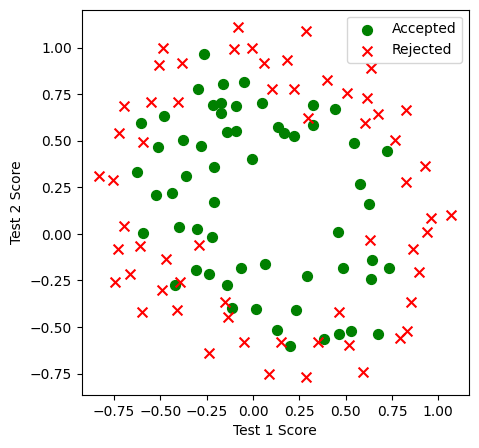

In [4]:
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(positive['Test 1'], positive['Test 2'],s=50, c='g', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'],s=50, c='r', marker='x', label='Rejected')

ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [5]:
degree = 4
x1 = data['Test 1']
x2 = data['Test 2']
print('x1\n' ,x1.head(10))
print('................................................')
print('x2\n' ,x2.head(10))

x1
 0    0.051267
1   -0.092742
2   -0.213710
3   -0.375000
4   -0.513250
5   -0.524770
6   -0.398040
7   -0.305880
8    0.016705
9    0.131910
Name: Test 1, dtype: float64
................................................
x2
 0    0.699560
1    0.684940
2    0.692250
3    0.502190
4    0.465640
5    0.209800
6    0.034357
7   -0.192250
8   -0.404240
9   -0.513890
Name: Test 2, dtype: float64


# adding a new column called ones before the data

In [6]:
data.insert(3, 'Ones',1) #adding x0
print('data\n' ,data.head(10))
print('................................................')

data
      Test 1    Test 2  Accepted  Ones
0  0.051267  0.699560         1     1
1 -0.092742  0.684940         1     1
2 -0.213710  0.692250         1     1
3 -0.375000  0.502190         1     1
4 -0.513250  0.465640         1     1
5 -0.524770  0.209800         1     1
6 -0.398040  0.034357         1     1
7 -0.305880 -0.192250         1     1
8  0.016705 -0.404240         1     1
9  0.131910 -0.513890         1     1
................................................


# increasing featurs number

data 
      Test 1    Test 2  Accepted  Ones       F10       F20       F21       F30  \
0  0.051267  0.699560         1     1  0.051267  0.002628  0.035864  0.000135   
1 -0.092742  0.684940         1     1 -0.092742  0.008601 -0.063523 -0.000798   
2 -0.213710  0.692250         1     1 -0.213710  0.045672 -0.147941 -0.009761   
3 -0.375000  0.502190         1     1 -0.375000  0.140625 -0.188321 -0.052734   
4 -0.513250  0.465640         1     1 -0.513250  0.263426 -0.238990 -0.135203   
5 -0.524770  0.209800         1     1 -0.524770  0.275384 -0.110097 -0.144513   
6 -0.398040  0.034357         1     1 -0.398040  0.158436 -0.013675 -0.063064   
7 -0.305880 -0.192250         1     1 -0.305880  0.093563  0.058805 -0.028619   
8  0.016705 -0.404240         1     1  0.016705  0.000279 -0.006753  0.000005   
9  0.131910 -0.513890         1     1  0.131910  0.017400 -0.067787  0.002295   

        F31       F32           F40       F41       F42       F43  
0  0.001839  0.025089  6.907989e-

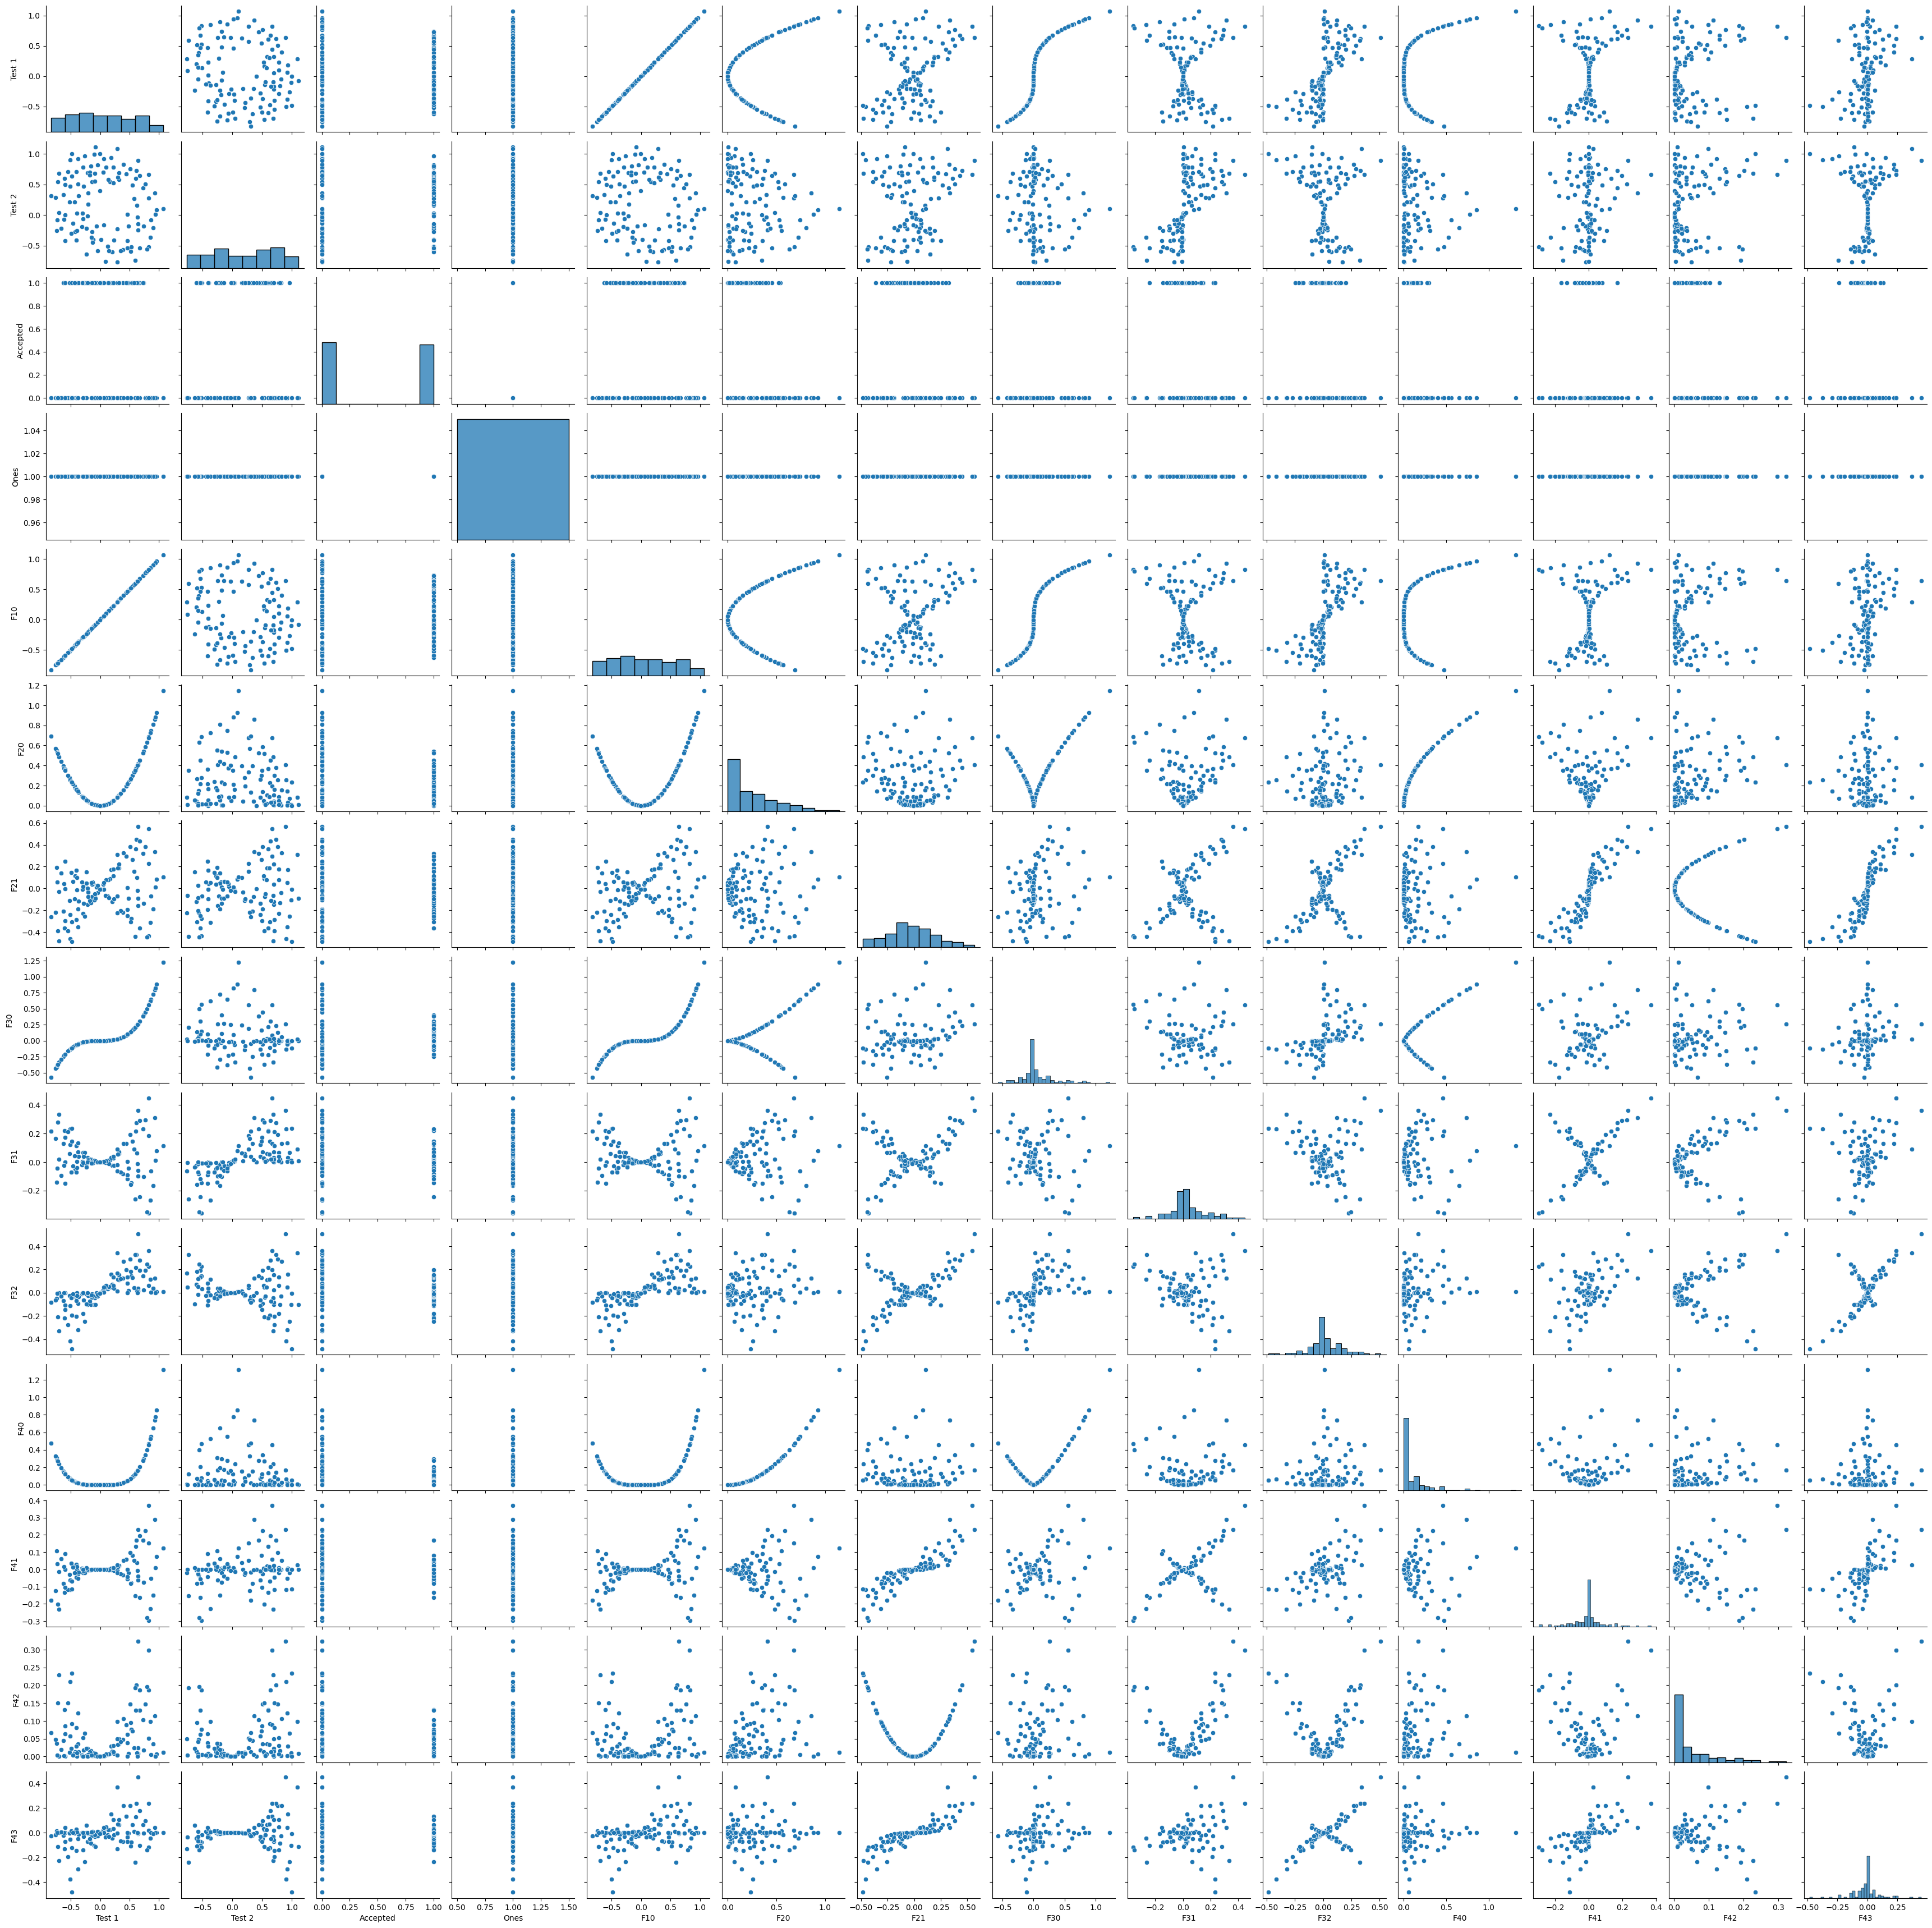

In [7]:
# x1 + x1^2 + x1 x2 + x1^3 + x1^2 x2 + x1 x2^2 + x1^4 + x1^3 x2 + x1^2 x2^2 + x1 x2^3

# F10 = x1

# F20 = x1^2
# F21 = x1x2

# F30 = x1^3
# F31 = x1^2x2
# F32 = x1x2^2

# F40 = x1^4
# F41 = x1^3 x2
# F42 = x1^2 x2^2
# F43 = x1 x2^3

for i in range(1, degree + 1): # 1, 2, 3, 4
    for j in range (0, i):
        data['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

print('data \n' , data.head(10))

sb.pairplot(data)

In [8]:
data.drop('Test 1', axis= 1, inplace= True)
data.drop('Test 2', axis= 1, inplace= True)
print('data \n' , data.head(10))

data 
    Accepted  Ones       F10       F20       F21       F30       F31       F32  \
0         1     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1         1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2         1     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3         1     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4         1     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   
5         1     1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098   
6         1     1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470   
7         1     1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305   
8         1     1  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730   
9         1     1  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835   

            F40       F41       F42       F43  
0  6.907989e-06  0.000094  0.001286  0.017551  
1  7.

# separate X (inputs data) from Y (target variable)

In [9]:
cols = data.shape[1]

X = data.iloc[:, 1: cols]
Y = data.iloc[:, 0:1]

print('X = \n')
print(X.head(10))
print('Y = \n')
print(Y.head(10))

X = 

   Ones       F10       F20       F21       F30       F31       F32  \
0     1  0.051267  0.002628  0.035864  0.000135  0.001839  0.025089   
1     1 -0.092742  0.008601 -0.063523 -0.000798  0.005891 -0.043509   
2     1 -0.213710  0.045672 -0.147941 -0.009761  0.031616 -0.102412   
3     1 -0.375000  0.140625 -0.188321 -0.052734  0.070620 -0.094573   
4     1 -0.513250  0.263426 -0.238990 -0.135203  0.122661 -0.111283   
5     1 -0.524770  0.275384 -0.110097 -0.144513  0.057775 -0.023098   
6     1 -0.398040  0.158436 -0.013675 -0.063064  0.005443 -0.000470   
7     1 -0.305880  0.093563  0.058805 -0.028619 -0.017987 -0.011305   
8     1  0.016705  0.000279 -0.006753  0.000005 -0.000113  0.002730   
9     1  0.131910  0.017400 -0.067787  0.002295 -0.008942  0.034835   

            F40       F41       F42       F43  
0  6.907989e-06  0.000094  0.001286  0.017551  
1  7.397855e-05 -0.000546  0.004035 -0.029801  
2  2.085928e-03 -0.006757  0.021886 -0.070895  
3  1.977539e-02 -0.0

# convert from data frame to matrix

In [10]:
X = np.matrix(X)
Y = np.matrix(Y)
theata = np.matrix(np.zeros(X.shape[1], dtype = int))

# Sigmoid Function

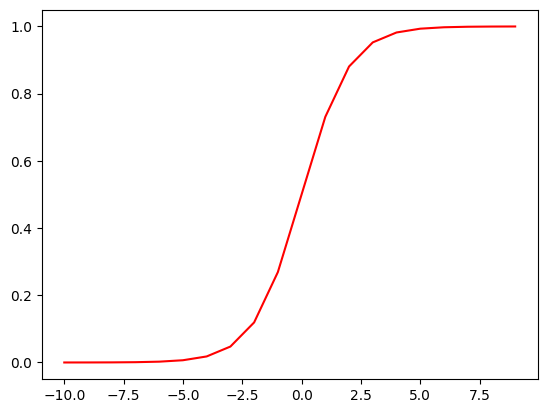

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

x = np.arange(-10, 10, step=1)
plt.plot(x, sigmoid(x), 'r')

# Cost function

In [12]:
def costReg(theata, X, Y, lamda):
    # we will reconvert theata to matrix on every recall because [[sp.optimize.fmin_tnc]] sends it as an array not matrix
    theata = np.matrix(theata)
    hx = sigmoid(X * theata.T)
    firstTerm = np.multiply(Y, np.log(hx))
    secondTerm = np.multiply((1-Y), np.log((1 - hx)))
    
    reg = (lamda/ len(X)) * np.sum(np.power(theata[:, 1: theata.shape[1]] , 2))

    return (-1 / len(X)) * np.sum(firstTerm + secondTerm) + reg

lamda = 0.001
print(costReg(theata, X, Y, lamda))

0.6931471805599454


# GDfunction

In [13]:
def gradientDescent(theata, X, Y, lamda):
    # we will reconvert theata to matrix on every recall because [[sp.optimize.fmin_tnc]] sends it as an array not matrix
    theata = np.matrix(theata)

    parametersCount = int(theata.shape[1])
    addedValueToTheata = np.matrix(np.zeros(parametersCount))

    hx = sigmoid(X * theata.T)
    error = hx - Y
    for i in range(parametersCount):
        term = np.multiply(error, X[:, i])
        # we will not subtract from old theata because [[sp.optimize.fmin_tnc]] will do it
        # just compute the new value to be added
        if(i == 0):
            addedValueToTheata[0,i] = (np.sum(term) / len(X))
        else:
            addedValueToTheata[0,i] = (np.sum(term)/len(X)) + ((lamda/len(X))* theata[:,i])

            
    return addedValueToTheata

In [14]:
result = sp.optimize.fmin_tnc(func= costReg, x0 = theata, fprime = gradientDescent, args=(X, Y, lamda))
print(result)

costafteroptimize = costReg(result[0], X, Y, lamda)
print(costafteroptimize)

(array([  0.55402475,  -0.23356006,  11.84562011,  -8.30498697,
         7.48099892,   8.94524758,  -0.05238442, -26.9321208 ,
         3.45472584, -30.70629085,   6.45119117]), 81, 1)
0.46647699034415313


C:\Users\hasme\AppData\Local\Temp\ipykernel_4308\384473117.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  addedValueToTheata[0,i] = (np.sum(term)/len(X)) + ((lamda/len(X))* theata[:,i])


# predict with new theatas

In [15]:
def predict(theta, X):
    predictedY = sigmoid(X * theta.T)
    return [1 if y >= 0.5 else 0 for y in predictedY]
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 93%
